<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [6]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-13 21:02:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  43.0MB/s    in 3.4s    

2025-06-13 21:02:31 (44.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



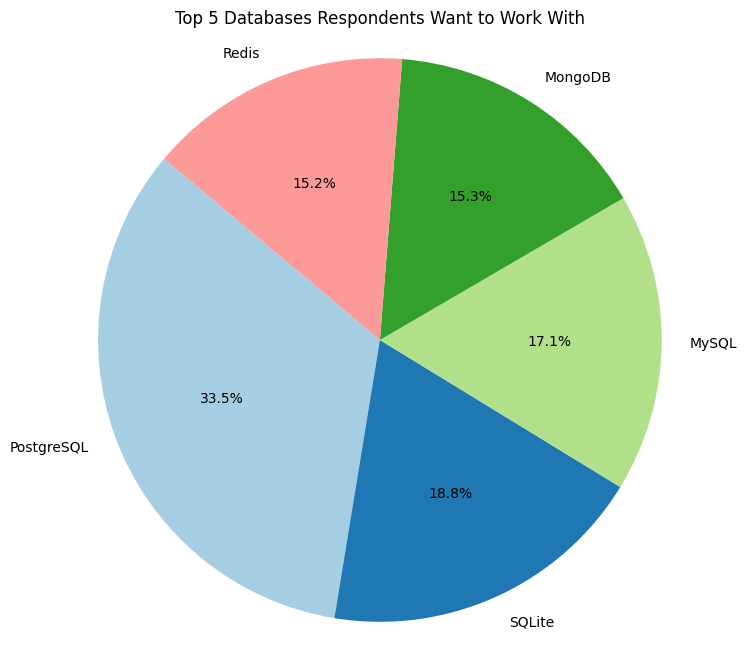

In [7]:
##Write your code here

# Drop missing values in the target column
df_filtered = df['DatabaseWantToWorkWith'].dropna()

# Split multiple responses into individual entries
df_exploded = df_filtered.str.split(';').explode()

# Count occurrences of each database
db_counts = df_exploded.value_counts()

# Get the top 5 databases
top_5 = db_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5,
    labels=top_5.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



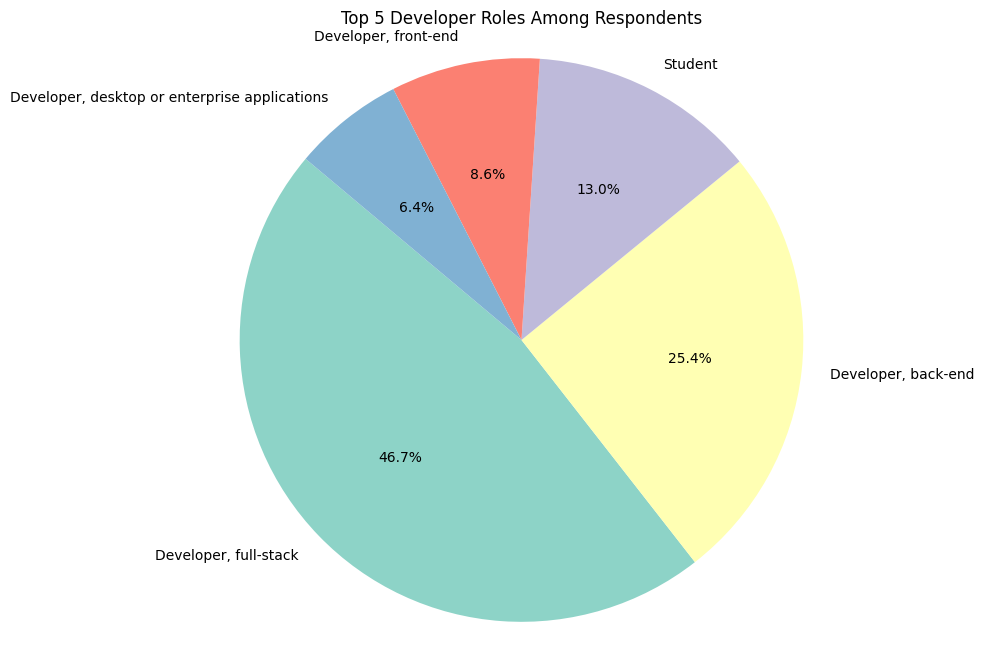

In [10]:
##Write your code here

# Drop missing values in DevType
df_filtered = df['DevType'].dropna()

# Split multiple roles per respondent and explode into separate rows
df_exploded = df_filtered.str.split(';').explode()

# Count frequency of each developer role
role_counts = df_exploded.value_counts()

# Get the top 5 roles
top_5_roles = role_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_roles,
    labels=top_5_roles.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Top 5 Developer Roles Among Respondents')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



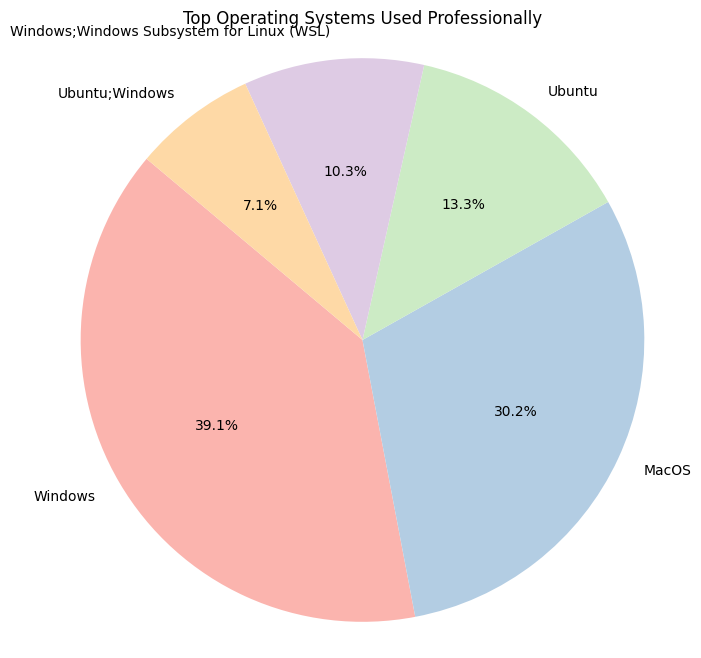

In [15]:
##Write your code here
# Drop missing values in 'OpSysProfessional use'
df_filtered = df['OpSysProfessional use'].dropna()

# Count occurrences of each operating system
os_counts = df_filtered.value_counts()

# Optional: Focus on top 5 most used OSs
top_os = os_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_os,
    labels=top_os.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Top Operating Systems Used Professionally')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



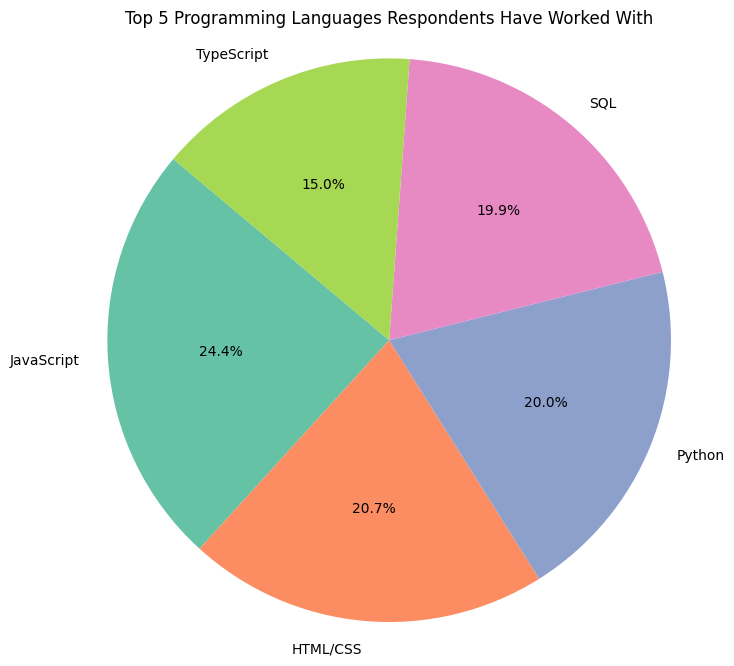

In [16]:
##Write your code here
# Drop missing values in 'LanguageHaveWorkedWith'
df_filtered = df['LanguageHaveWorkedWith'].dropna()

# Split multiple languages and explode into separate rows
df_exploded = df_filtered.str.split(';').explode()

# Count frequency of each language
lang_counts = df_exploded.value_counts()

# Select top 5 languages
top_5_langs = lang_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_langs,
    labels=top_5_langs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors
)
plt.title('Top 5 Programming Languages Respondents Have Worked With')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



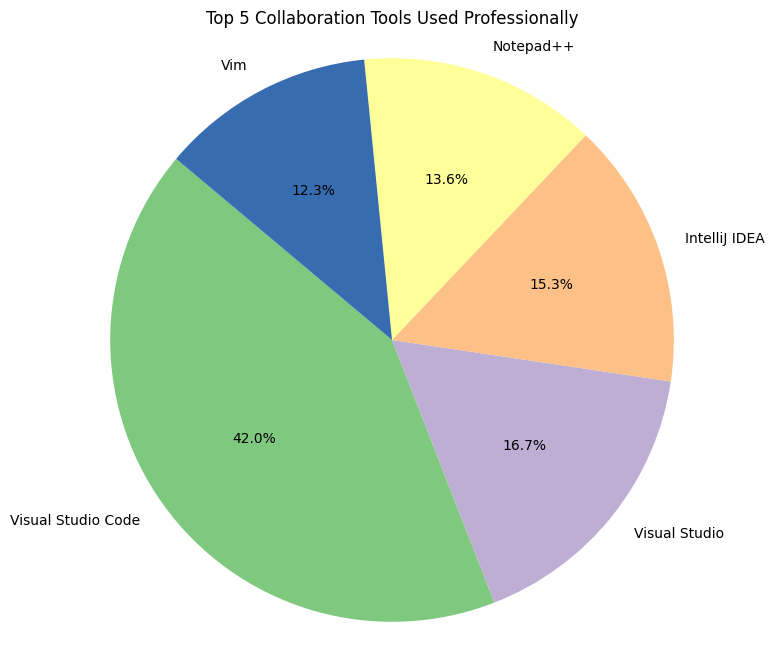

In [17]:
##Write your code here

# Drop missing values in the collaboration tools column
df_filtered = df['NEWCollabToolsHaveWorkedWith'].dropna()

# Split multiple tools (semicolon-separated) and explode into individual rows
df_exploded = df_filtered.str.split(';').explode()

# Count how often each tool was used
tool_counts = df_exploded.value_counts()

# Select top 5 tools
top_5_tools = tool_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_tools,
    labels=top_5_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Accent.colors
)
plt.title('Top 5 Collaboration Tools Used Professionally')
plt.axis('equal')  # Keep the pie chart circular
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



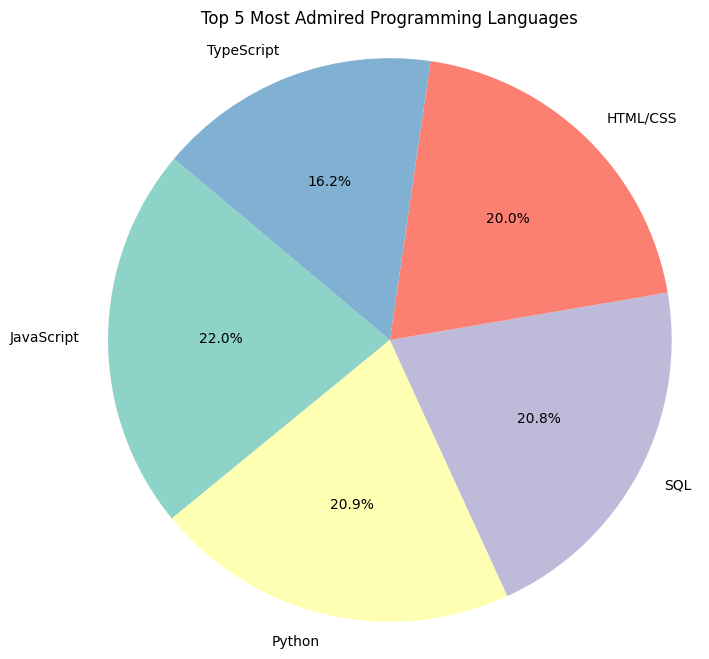

In [18]:
##Write your code here

# Drop missing values from the LanguageAdmired column
df_filtered = df['LanguageAdmired'].dropna()

# Split multiple admired languages per respondent and flatten the list
df_exploded = df_filtered.str.split(';').explode()

# Count each admired language
admired_counts = df_exploded.value_counts()

# Select the top 5 admired languages
top_5_admired = admired_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_admired,
    labels=top_5_admired.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Top 5 Most Admired Programming Languages')
plt.axis('equal')  # Ensures a perfect circle
plt.show()


In this pie Chart, JavaScript is the most admired language, after is Python and so on.

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



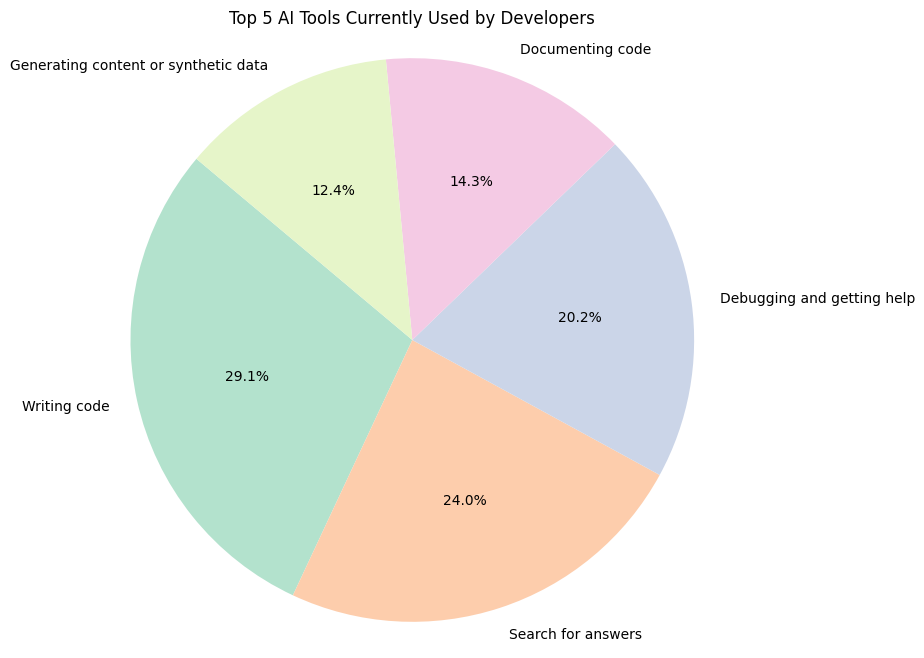

In [23]:
##Write your code here

# Drop missing values in the AI tools column
df_filtered = df['AIToolCurrently Using'].dropna()

# Split multiple tools (semicolon-separated) and explode into individual entries
df_exploded = df_filtered.str.split(';').explode()

# Count how often each AI tool is used
ai_tool_counts = df_exploded.value_counts()

# Select top 5 tools
top_5_ai_tools = ai_tool_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_ai_tools,
    labels=top_5_ai_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors
)
plt.title('Top 5 AI Tools Currently Used by Developers')
plt.axis('equal')  # Keeps the pie circular
plt.show()


In [22]:
print(df.columns.to_list())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



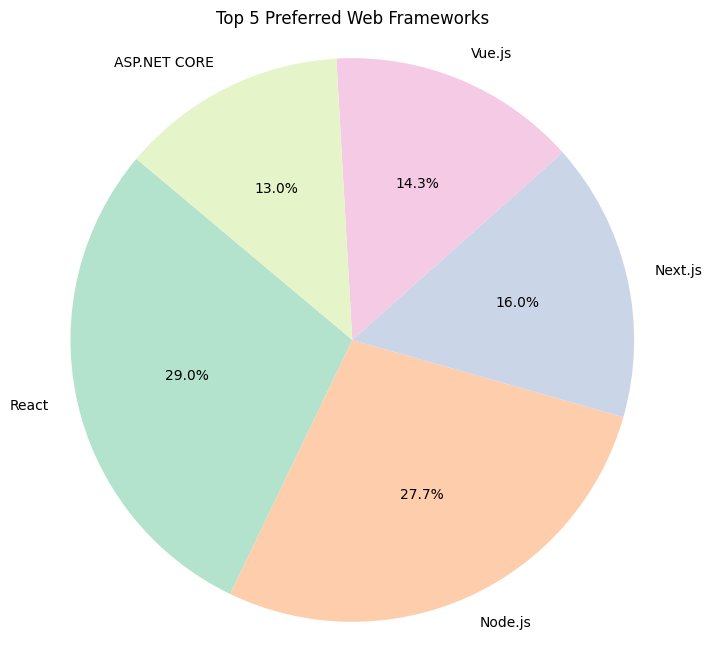

In [25]:
##Write your code here

# Drop missing values in the web framework column
df_filtered = df['WebframeWantToWorkWith'].dropna()

# Split multiple frameworks per respondent and flatten
df_exploded = df_filtered.str.split(';').explode()

# Count frequency of each framework
framework_counts = df_exploded.value_counts()

# Select top 5 frameworks
top_5_frameworks = framework_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_frameworks,
    labels=top_5_frameworks.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors
)
plt.title('Top 5 Preferred Web Frameworks')
plt.axis('equal')  # Ensures a perfect circle
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



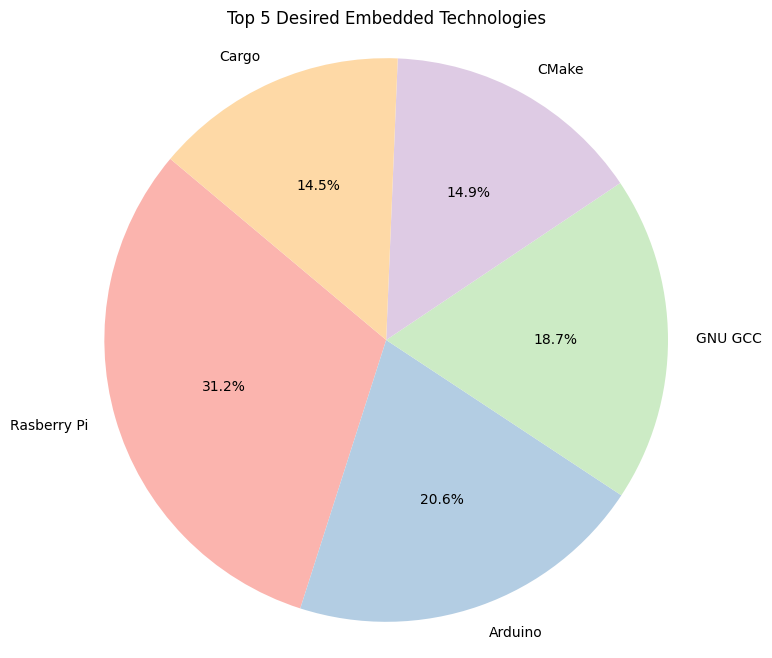

In [26]:
##Write your code here

# Drop missing values in the EmbeddedWantToWorkWith column
df_filtered = df['EmbeddedWantToWorkWith'].dropna()

# Split multiple values (semicolon-separated) and flatten
df_exploded = df_filtered.str.split(';').explode()

# Count occurrences of each embedded technology
embedded_counts = df_exploded.value_counts()

# Get top 5 desired embedded technologies
top_5_embedded = embedded_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_embedded,
    labels=top_5_embedded.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Top 5 Desired Embedded Technologies')
plt.axis('equal')  # Keeps pie chart circular
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
